In [1]:
#用浅层神经网络实现二分类图像识别

In [93]:
#导入相关模块
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [111]:
#使用两层神经网络，使用relu函数和sigmoid函数，第一层n_h节点
def init_paramters(n_x,n_h,n_y):
    paramters = {}
    W1 = np.random.rand(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.rand(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    paramters['W1'] = W1
    paramters['b1'] = b1
    paramters['W2'] = W2
    paramters['b2'] = b2
    return paramters

In [112]:
def relu(x):
    return (abs(x)+x)/2

In [113]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [114]:
#进行前向传播
def forward(X,paramters):
    caches = {}
    W1 = paramters['W1']
    b1 = paramters['b1']
    W2 = paramters['W2']
    b2 = paramters['b2']
    Z1 = np.dot(W1,X)+b1
    caches['Z1'] = Z1
    A1 = relu(Z1)
    caches['A1'] = A1
    Z2 = np.dot(W2,A1)+b2
    caches['Z2'] = Z2
    A2 = sigmoid(Z2)
    caches['A2'] = A2
    return caches

In [115]:
#计算损失函数
def computeCost(A,Y):
    return (-1/A.shape[1])*np.sum((Y*np.log(A))+(1-Y)*np.log(1-A))

In [116]:
#进行反向传播计算
def backward(X,caches,Y,paramters):
    m = Y.shape[1]
    A2 = caches['A2']
    Z2 = caches['Z2']
    A1 = caches['A1']
    W2=  paramters['W2']
    dZ2 = A2-Y
    dW2 = (1/m)*np.dot(dZ2,A1.T)
    db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)
    dA1 = np.dot(W2.T,dZ2)
    dZ1 = dA1
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1,axis = 1,keepdims=True)
    dercaches ={}
    dercaches['dW2'] = dW2
    dercaches['db2'] = db2
    dercaches['dW1'] = dW1
    dercaches['db1'] = db1
    return dercaches

In [117]:
#更新参数
def update_paramters(paramters,dercaches,learning_rate):
    paramters['W1'] = paramters['W1']-learning_rate*dercaches['dW1']
    paramters['b1'] = paramters['b1']-learning_rate*dercaches['db1']
    paramters['W2'] = paramters['W2']-learning_rate*dercaches['dW2']
    paramters['b2'] = paramters['b2']-learning_rate*dercaches['db2']
    return paramters

In [149]:
def predict(X,y,paramters):
    caches = forward(X,paramters)    
    a = caches['A2']
    y_prediction = np.zeros((1,y.shape[1]))
    for i in range(y.shape[1]):
        if(a[0,i]>=0.5):
            y_prediction[0,i] = 1
        else:
            y_prediction[0,i] = 0
    return y_prediction

In [163]:
#建立浅层神经网络模型
def nn_model(X,Y,learning_rate,iterations):
    losses = []
    n_x=  X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    paramters = init_paramters(n_x,n_h,n_y)
    for i in range(iterations):
        caches = forward(X,paramters)
        cost = computeCost(caches['A2'],Y)
        dercaches = backward(X,caches,Y,paramters)
        paramters  = update_paramters(paramters,dercaches,learning_rate)
        losses.append(cost)
        if(i%100==0):
            print(cost)
    return paramters,losses

In [151]:
f = h5py.File(r"C:\Users\alex\Desktop\train_catvnoncat.h5",'r')

In [152]:
train_set_ori_x = np.array(f['train_set_x'][:])
train_set_ori_y = np.array(f['train_set_y'][:])

In [153]:
f = h5py.File(r"C:\Users\alex\Desktop\test_catvnoncat.h5",'r')

In [154]:
test_set_ori_x = np.array(f['test_set_x'][:])
test_set_ori_y = np.array(f['test_set_y'][:])

In [155]:
train_set_x = train_set_ori_x.reshape(train_set_ori_x.shape[0],-1).T
train_set_y = train_set_ori_y.reshape(1,-1)
test_set_x=test_set_ori_x.reshape(test_set_ori_x.shape[0],-1).T
test_set_y = test_set_ori_y.reshape(1,-1)

In [156]:
train_set_x = train_set_x/255
m = train_set_y.shape[1]
test_set_x = test_set_x/255

In [173]:
paramters,losses=nn_model(train_set_x,train_set_y,0.005,2000)

0.7737491830200948
0.7109053449997434
0.6619208970951497
0.653813189200036
0.6523479516463687
0.6516448772965442
0.6506773814464442
0.6487075024938642
0.644341286487446
0.6432704759003351
0.6279816255456812
0.6053684658875003
0.5771133009193178
0.5455296831548249
0.5119445179124789
0.47745719717157725
0.4431055783728172
0.4094105898863075
0.3766538418291505
0.3450517681943573


In [174]:
print(paramters)

{'W1': array([[ 0.00245912,  0.00291737,  0.00644313, ...,  0.00450388,
         0.00636115,  0.00222392],
       [-0.00722182,  0.01621524,  0.0119877 , ...,  0.0130055 ,
         0.01634857, -0.00079016],
       [ 0.00308469, -0.00562523,  0.00134114, ...,  0.00596606,
        -0.00333351,  0.00210128],
       [ 0.01036637, -0.00880492, -0.00089921, ...,  0.00228667,
        -0.00528014,  0.00634872]]), 'b1': array([[-0.00012921],
       [ 0.00427648],
       [-0.00794133],
       [-0.01255362]]), 'W2': array([[-0.30990024, -0.63005491,  0.26523499,  0.59503678]]), 'b2': array([[-0.1122649]])}


In [175]:
y_prediction_train = predict(train_set_x,train_set_y,paramters)
y_prediction_test = predict(test_set_x,test_set_y,paramters)
print('train accuracy: {} %'.format(100-np.mean(np.abs(y_prediction_train-train_set_y))*100))
print('test accuracy: {} %'.format(100-np.mean(np.abs(y_prediction_test-test_set_y))*100))

train accuracy: 88.03827751196172 %
test accuracy: 80.0 %


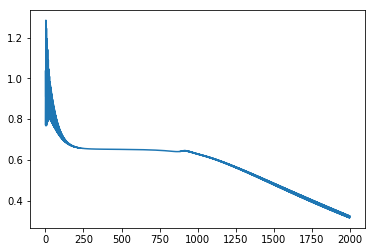

In [176]:
plt.plot(losses)